In [12]:
# !pip install seaborn
# !pip install learning-curves
# !pip install scikit-learn
!pip install learning

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit

import Learning_Curves as lc

ImportError: cannot import name 'Learning_Curves' from 'sklearn.model_selection' (c:\Users\BlueShift\miniconda3\envs\infnetSports\Lib\site-packages\sklearn\model_selection\__init__.py)

In [2]:
# Carregando a base
base_treinamento = pd.read_csv('data/fraud_dataset.csv')

C:\Users\BlueShift\AppData\Local\Temp\ipykernel_2980\2979599330.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
C:\Users\BlueShift\AppData\Local\Temp\ipykernel_2980\2979599330.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=base_treinamento, palette='hls')


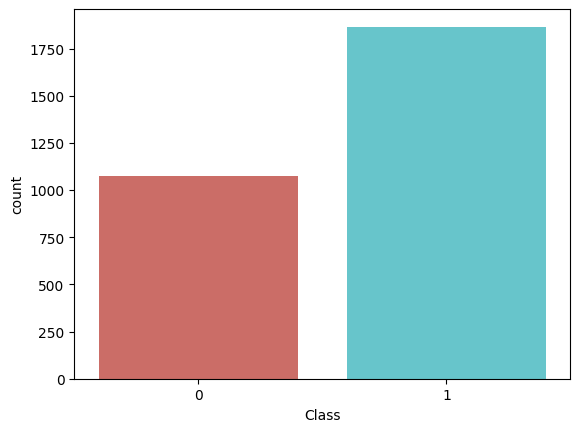

[[111 106]
 [ 56 316]]
              precision    recall  f1-score   support

    Saudavel       0.66      0.51      0.58       217
    Suspeito       0.75      0.85      0.80       372

    accuracy                           0.72       589
   macro avg       0.71      0.68      0.69       589
weighted avg       0.72      0.72      0.72       589

Accuracy: 0.7249575551782682
Precision: 0.7488151658767772
Recall: 0.8494623655913979


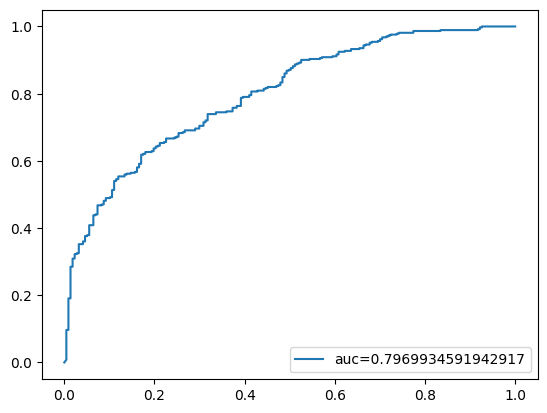

In [3]:
X = base_treinamento[[
    'V1',
    'V2',
    'V3',
    'V4',
    'V5',
    'V6',
    'V7',
    'V8',
    'V9',
    'V10',
    'V11',
    'V12',
    'V13',
    'V14',
    'V15',
    'V16',
    'V17',
    'V18',
    'V19',
]]


y = base_treinamento['Class']

# Garantindo que não existem NAs para não termos problemas na modelagem.
X.fillna(0, inplace=True)

# Transformando tudo para float
X = X.astype(float)
#######################################

# Verificando o balanceamento do problema
# 64% - 36%
base_treinamento['Class'].value_counts()
sns.countplot(x='Class', data=base_treinamento, palette='hls')
plt.show()

#######################################
# Separando dados para treino e teste 
# São dois grupos de dados, um para uso no modelo e outro para uso na validação.

# Separando os dados de treino e teste para o modelo
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Para usarmos a base toda na construção das curvas de aprendizado
# e deixar a função separar treino e teste.
X_TR, X_TE, y_TR, y_TE = train_test_split(X,y,test_size=0.00001)
#######################################

#######################################

#######################################
# Aplicando um modelo Random Forest "vanilla", com todos os parâmetros padrão de aplicação.
clf = RandomForestClassifier(max_depth=5, max_features=10, n_jobs=-1)
clf.fit(X_train,y_train)

# Avaliando uma única execução
y_pred_teste = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred_teste))
print(metrics.classification_report(y_test, y_pred_teste,
                                    target_names=['Saudavel','Suspeito']))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_teste))
print("Precision:",metrics.precision_score(y_test, y_pred_teste))
print("Recall:",metrics.recall_score(y_test, y_pred_teste))

# Curva ROC.
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
#plt.show()

In [ ]:
# Learning Curves
titulo = "Learning Curves (Random Forest)"
# Cross validation com para uma visualização mais suave,
# sempre usando 20% dos dados para teste.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

lc.plot_learning_curve(clf, titulo, X_train, y_train, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)


# Feature importance
feat_imp_RF = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importance'])
feat_imp_df = feat_imp_RF.sort_values(['Importance'], ascending=False)
feat_imp_df.reset_index(inplace=True)
feat_imp_chart = sns.barplot(x='index', y='Importance', data=feat_imp_df,)
feat_imp_chart.set_xticklabels(feat_imp_chart.get_xticklabels(), rotation=90)


#######################################

